<a href="https://colab.research.google.com/github/fasalulfidhapp/cat-vs-dog-classifier/blob/main/Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/Colab Notebooks/archive(1).zip"
extract_path = "/content/cats_dog_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

print("✅ Dataset unzipped successfully!")

✅ Dataset unzipped successfully!


In [ ]:
import os

base_dir = "/content/cats_dogs_data"

for root, dirs, files in os.walk(base_dir):
    print("📁 Folder:", root)
    print("📁 Subfolders:", dirs)
    print("📄 Files:", files[:5])
    break






In [ ]:
for root, dirs, files in os.walk(base_dir + "/PetImages"):
    print("📁 Folder:", root)
    print("📁 Subfolders:", dirs)
    print("📄 Files:", files[:5])
    break

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
from PIL import Image

def remove_corrupted_images(folder):
    num_removed = 0
    for category in ["Cat", "Dog"]:
        folder_path = os.path.join(folder, category)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            try:
                with Image.open(img_path) as img:
                    img.verify()  # verify that it is, in fact, an image
            except:
                os.remove(img_path)
                num_removed += 1
    print(f"✅ Removed {num_removed} corrupted images.")

remove_corrupted_images("/content/cats_dog_data/PetImages")

✅ Removed 4 corrupted images.


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "/content/cats_dog_data/PetImages"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1060s 2s/step - accuracy: 0.5868 - loss: 0.6999 - val_accuracy: 0.6661 - val_loss: 0.6074
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1040s 2s/step - accuracy: 0.6992 - loss: 0.5772 - val_accuracy: 0.7183 - val_loss: 0.5610
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 997s 2s/step - accuracy: 0.7353 - loss: 0.5250 - val_accuracy: 0.7677 - val_loss: 0.4848
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1028s 2s/step - accuracy: 0.7621 - loss: 0.4947 - val_accuracy: 0.7819 - val_loss: 0.4555
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 970s 2s/step - accuracy: 0.7743 - loss: 0.4709 - val_accuracy: 0.7941 - val_loss: 0.4499
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 972s 2s/step - accuracy: 0.7871 - loss: 0.4550 - val_accuracy: 0.7845 - val_loss: 0.4618
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 971s 2s/step - accuracy: 0.7943 - loss: 0.4455 - val_accuracy: 0.8085 - val_loss: 0.4202
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 967s 2s/step - accuracy: 0.7993 - loss: 0.4319 - val_a

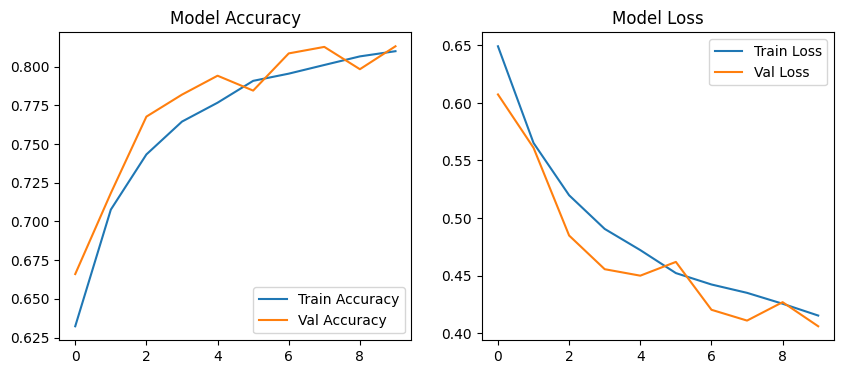

In [ ]:
import matplotlib.pyplot as plt

# Make sure to run the previous cell to train the model and define the 'history' variable

# Plot accuracy
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img("cat_photo.jpg", target_size=(150, 150))  # Replace with your file name
img = image.img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)[0][0]

if prediction > 0.5:
    print("🐶 It's a DOG!")
else:
    print("🐱 It's a CAT!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
🐱 It's a CAT!


In [ ]:
model.save("cats_vs_dogs_model.keras")
print("✅ Model saved successfully!")

✅ Model saved successfully!


In [ ]:
model.save("cats_vs_dogs_model.h5")
print("✅ Model saved successfully!")

✅ Model saved successfully!
